# HW 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import time
from dsp_toolbox import dft, apply_dft_matrix, create_dft_matrix, plot_dft_magnitude_angle, idft, convolve_signals, zero_pad_signal
from utils import visualize_dft_matrix, generate_gaussian_kernel

In [2]:
# In a terminal install the cvxpy library -> "pip install cvxpy" 
# You may need to add the --user flag if you don't have admin privileges
import cvxpy as cp
import IPython.display as ipd


## 1. Optimization

In class you have learned how to form optimization problems via formulations of minimization, constraints, and penalties. 
We will now use the library CVXPY to solve the problem on your quiz as well as create a more elaborate optimization problem.

### 1.0 CVXPY Tutorial

The code block below shows you the basics of using the optimization library. <br>
It optimizes the following problem: <br>
<br>
$argmin_{x} ||y-Ax||^{2}_{2}$ <br>
subject to $x \geq 0$, $x \leq 1$

In [3]:
# Problem data.
m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n) # creates a random matrix of size m x n
y =  np.random.randn(m) # creates a random vector of size m

print(f"A looks like {A.shape}")
print(f"y looks like {y}")
print(f"y shape is {y.shape}")



# Construct the problem.
x = cp.Variable(n) # creates a variable vector of size n to be optimized
objective = cp.Minimize(cp.sum_squares(A @ x - y)) # '@' is the matrix multiplication operator
constraints = [0 <= x, x <= 1] # creates a list of constraints
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`

# test for my understanding 

M = A @ x

print("optimised x is", x.value)
print("optimised A*x is", A @ x)

dif_mat = np.zeros(m)

# for i in range(M.shape[0]):
dif_mat = cp.abs(A @ x - y)

print("dif_mat is", dif_mat)


A looks like (30, 20)
y looks like [-1.07296428  0.49515861 -0.9520621  -0.51814555 -1.4614036  -0.51634791
  0.3511169  -0.06877046 -1.34776494  1.47073986  0.33722094  1.00806543
  0.78522692 -0.66486777 -1.94504696 -0.91542437  1.22515585 -1.05354607
  0.81604368 -0.61240697  0.39310924 -1.82391985  1.16707517 -0.0396687
  0.8858258   0.18986165  0.7980638  -0.10193204  0.74335654 -1.50957268]
y shape is (30,)
optimised x is [-1.79109255e-19  2.85112420e-02  2.79973443e-19  3.37658729e-20
 -2.72802663e-19  1.49285011e-01 -9.94082533e-20  8.35373900e-20
  2.46718649e-01  5.78224144e-01 -4.03739463e-19  1.01242860e-03
 -9.28486180e-20  2.26767464e-01 -1.58813678e-19 -8.97232272e-20
 -1.22145729e-19 -1.51509428e-19  1.12060672e-19 -3.48318635e-19]
optimised A*x is [[ 1.62434536e+00 -6.11756414e-01 -5.28171752e-01 -1.07296862e+00
   8.65407629e-01 -2.30153870e+00  1.74481176e+00 -7.61206901e-01
   3.19039096e-01 -2.49370375e-01  1.46210794e+00 -2.06014071e+00
  -3.22417204e-01 -3.840543

### 1.1 Solve Quiz 13 Problem

You are tasked with programming the motor of a robotic arm to perform various motions.
Your task is to match a theoretical motion, y, with a motion, x, that closely matches it under the
physical constraints of the motor. The constraint is that neighboring elements in x cannot have an
absolute difference greater than 5 units (the motor cannot have a change in position greater than 5
over 1 discrete unit of time). 

Assume the sampling frequency here is 5 Hz.

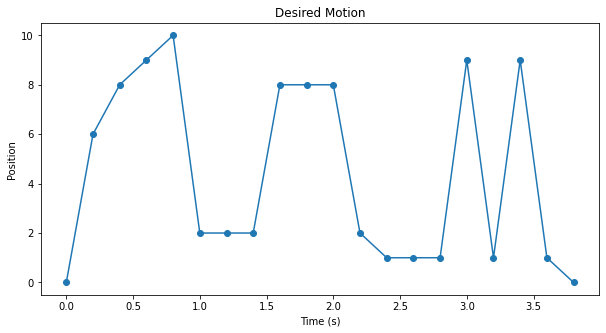

In [4]:
# The desired motion is hardcoded in the variable 'y' and plotted below
# sampling freq = 5Hz

t = np.arange(0,20,1)/5
y = np.array([0,6,8,9,10,2,2,2,8,8,8,2,1,1,1,9,1,9,1,0,])

plt.figure(figsize=(10,5))
plt.plot(t,y, '-o')
plt.xlabel('Time (s)')
plt.ylabel('Position')
plt.title('Desired Motion')
plt.show()

In [5]:
sizey = len(y)
print("sizey is", sizey)
print("n is", n)
D_dim = (n-1, n)
print("D_dim is", D_dim)


D = np.zeros(D_dim)

for i in range(0, D.shape[0]):
    D[i][i] = -1
    D[i][i+1] = 1

print("D is", D)

sizey is 20
n is 20
D_dim is (19, 20)
D is [[-1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0. 

[0.5 5.5 8.  9.  8.5 3.5 2.  2.5 7.5 8.  7.5 2.5 1.  1.  2.2 7.2 2.2 7.2
 2.2 0. ]


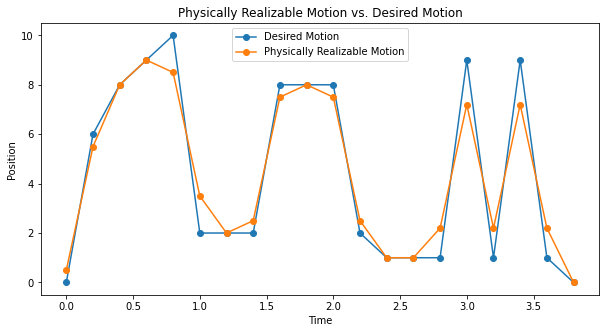

Error between desired and realized motion: 13.2


In [6]:
################# Edit the code below to solve for X #################
# You may want to create the matrix D here
# D = ...


x = cp.Variable(n) # creates a variable vector of size n to be optimized
objective = cp.Minimize(cp.sum_squares(y - x)) # Fill in the objective function

Dx = D @ x


constraints = [-5 <= Dx , Dx <= 5] # creates a list of constraints
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)

# The optimal motion is stored in the variable 'x' and plotted below
plt.figure(figsize=(10,5))
plt.plot(t, y, '-o', label='Desired Motion')
plt.plot(t, x.value, '-o', label='Physically Realizable Motion')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Physically Realizable Motion vs. Desired Motion')
plt.legend()
plt.show()### 1.1 Solve Quiz 13 Problem

print(f"Error between desired and realized motion: {np.sum(np.abs(y-x.value))}")

### 1.2 Adding Penalties

Now assume that the robotic arm degrades over time when performing motion at a certain frequency or higher. <br>
We would like to add a penalty term to the Minimization to penalize frequecies that are equal to or higher than 1 Hz. <br>
Formally, put a penalty on the square of the magnitude of frequencies equal to or higher than 1 Hz. <br>
<br>
Hint: The function in the cvpxy library 'cp.abs()' may be useful. <br>
Suggestion: Writing out the optimization problem on paper first may be helpful.

dft of y is [ 8.80000000e+01+0.00000000e+00j -5.15311326e-01-1.52567796e+01j
 -2.30901699e+00-3.75122550e+00j -3.10891247e+01-2.44541596e+01j
 -3.28115295e+00+7.02066688e+00j  1.03250741e-14-4.00000000e+00j
 -1.19098301e+00-8.19623738e+00j  2.14485280e+00-9.58028222e+00j
  6.78115295e+00+5.65333853e+00j -1.05404168e+01+2.02223378e+01j
 -8.00000000e+00-2.62413059e-14j -1.05404168e+01-2.02223378e+01j
  6.78115295e+00-5.65333853e+00j  2.14485280e+00+9.58028222e+00j
 -1.19098301e+00+8.19623738e+00j -5.74937774e-14+4.00000000e+00j
 -3.28115295e+00-7.02066688e+00j -3.10891247e+01+2.44541596e+01j
 -2.30901699e+00+3.75122550e+00j -5.15311326e-01+1.52567796e+01j]
16


ValueError: Cannot broadcast dimensions  (16,) (20,)

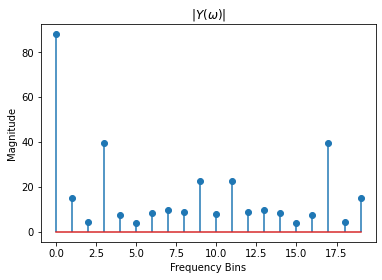

In [7]:
################ Edit the code below to solve for X #################

# You may want to create the matrix D here
# D = ... 


# As well as the DFT matrix
# DFT_matrix = ...

dft_y = dft(y)

print("dft of y is", dft_y)

# frequency resolution = (sampling rate) / (number of samples)
#                      = 5 Hz / 100
#                      = 0.05 Hz 
# freqofbin = k * freq_resolution 
# 1 = k * 1/4
# k = 4 --- bin 4 onwards is frequencies equal to or higher than 1Hz. 

cutoffbin = 4

dft_highfreq_y = dft_y[cutoffbin:]
t_highfreq_y = idft(dft_highfreq_y)
print(len(t_highfreq_y))


plt.stem(np.abs(dft_y))
plt.title(r"$|Y(\omega)|$")
plt.ylabel("Magnitude")
plt.xlabel("Frequency Bins")


x = cp.Variable(n) # creates a variable vector of size n to be optimized
alpha = 1e-1
objective = cp.Minimize(cp.sum_squares(y-x) + alpha*cp.sum_squares(t_highfreq_y - x)) # Fill in the objective function as well as the penalty term
constraints = [-5 <= Dx , Dx <= 5] # Fill in the constraints
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)

# The optimal motion is stored in the variable 'x' and plotted below
plt.figure(figsize=(10,5))
plt.plot(t, y, '-o', label='Desired Motion')
plt.plot(t, x.value, '-o', label='Physically Realizable Motion')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Physically Realizable Motion vs. Desired Motion')
plt.show()### 1.1 Solve Quiz 13 Problem

print(f"Error between desired and realized motion: {np.sum(np.abs(y-x.value))}")

Question 1: Why is the error between the desired and realized motion larger in Section 1.3 than Section 1.2?

Answer: 

Question 2: Why does the solution in Section 1.3 differ greatly from the solution in Section 1.2 around the time 3-3.5 seconds?

Answer: 

## 2. FFT

In HW 4 you were asked to code the DFT and its properties from scratch. Since you know now how it works, we can use Python libraries that have optimized functions for computing the DFT to compare with out Naive implementation.

### DFT vs. FFT Speed Comparison

In this question, we want to measure how fast the FFT is compared to a naive implementation of the DFT. Some helper functions have been added for you. <br>
In order to see the difference, plot the time it takes to compute the DFT vs. FFT for different length signals of size (N). Make sure your plot spans from values of N from 2 to 16384.

In [13]:
def get_dft_matrix(x_signal):
    N = len(x_signal)
    dftmtx = np.fft.fft(np.eye(N))
    return dftmtx

def dft(x_signal):
    dftmtx = get_dft_matrix(x_signal)
    return np.matmul(dftmtx, x_signal)

def generate_random_signal(N):
    return np.random.randn(N)

def dft_total(N):
    x_signal = generate_random_signal(N)
    dftmatrix = get_dft_matrix(x_signal)
    x_dft = dft(x_signal)

def f_fft(N):
    x_signal = generate_random_signal(N)
    np.fft.fft(x_signal)





[2, 3, 7, 13, 26, 49, 94, 180, 343, 653, 1243, 2366, 4502, 8566, 16300]


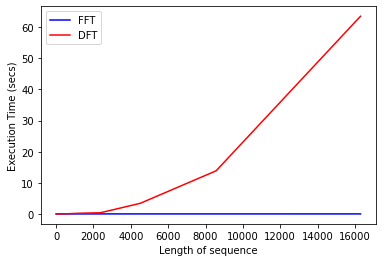

In [16]:
################# Write you code and make your plot below in this cell #################
# Your generated plot should have two curves, one for DFT and one for FFT
# The x-axis should be the length of the signal, and the y-axis should be the time it takes to compute the DFT/FFT
# Hint: use the time module and the time.time() function to measure the time it takes for computation
# Hint: use the np.fft.fft function to compute the FFT
# Hint: Use the functions defined above to compute the DFT

import time

# 1. establish size of vector values I will use in range (2, 16384)

# define the start and end points
start = 2
end = 16300

# define the number of elements in the sequence
num_elements = 15

# create a logarithmic sequence of numbers between start and end
log_seq = np.logspace(np.log10(start), np.log10(end), num=num_elements)

int_log_seq = [int(x) for x in log_seq]

print(int_log_seq)

exec_times_dft = np.zeros(len(int_log_seq))
exec_times_fft = np.zeros(len(int_log_seq))

for i in range(len(int_log_seq)):
    start_time = time.time()
    dft_total(int_log_seq[i])
    end_time = time.time()
    execution_time = end_time - start_time
    exec_times_dft[i] = execution_time

for i in range(len(int_log_seq)):
    start_time = time.time()
    f_fft(int_log_seq[i])
    end_time = time.time()
    execution_time = end_time - start_time
    exec_times_fft[i] = execution_time


plt.plot(int_log_seq, exec_times_fft, 'b', label = "FFT")
plt.plot(int_log_seq, exec_times_dft, 'r', label = "DFT")
plt.ylabel("Execution Time (secs)")
plt.xlabel("Length of sequence")
plt.legend()
plt.show()


In [17]:
print(exec_times_fft)

[4.74619865e-03 7.54117966e-04 6.81877136e-05 9.29832458e-05
 2.53176689e-03 6.47783279e-04 6.06298447e-04 1.64270401e-04
 7.59840012e-04 2.44379044e-04 1.42097473e-04 7.34806061e-04
 3.49187851e-03 4.03785706e-03 2.13694572e-03]


Question 2: What do you observe about the computational complexity of the naive DFT and FFT algorithms?

Answer: 

At almost any length of sequence, the FFT takes significantly less time than the naive DFT. However, as the length of the sequence increases, the gap between the time increases almost exponentially for the DFT, whereas (in comparison) the FFT line stays flat. 

This supports the idea that the computational complexity of the FFT is O(NlogN), as opposed to the computational complexity of the DFT, which is O(n^2)